<a href="https://colab.research.google.com/github/Mariyyah-Alrasheed/6_Week/blob/main/Copy_of_Basic_OCR_exrecise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will perform text detection in images using OCR. We will start with image preprocessing and then conduct OCR using Tesseract, EasyOCR, and KerasOCR. By the end of this notebook, you will understand how to enhance image quality for OCR and extract text effectively from images.



# Install and Import Libraries

In [1]:
!pip install tensorflow==2.9.1 keras==2.9.0

In [2]:
!apt-get update
!apt-get install -y tesseract-ocr

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,498 kB]
Fetched 2,755 kB in 1s (1,843 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' a

In [3]:
!pip install pytesseract
!pip install easyocr
!pip install keras-ocr

In [4]:
import cv2
import pytesseract
import easyocr
import keras_ocr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Image Preprocessing

In [5]:
# Convert it to gray
def to_gray(image):
  return cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

# Noise removal
def remove_Noise(image):
  return cv2.medianBlur(image , 5)

# sharpening
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])  # Sharpening kernel
    return cv2.filter2D(image, -1, kernel)

# Binarization
def Binarization(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Helper display function
def display_image(image, title, is_rgb=False):
    if is_rgb:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      plt.imshow(image)
    else:
      plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


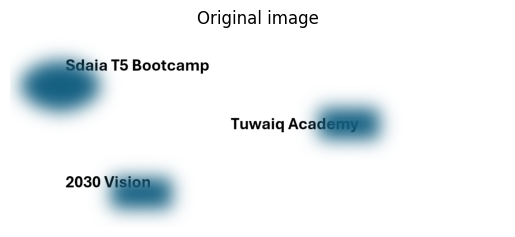

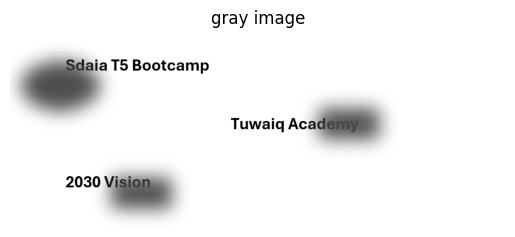

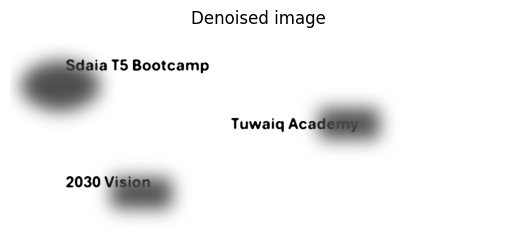

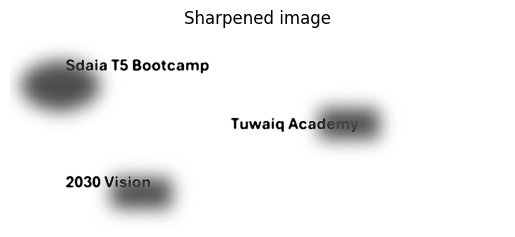

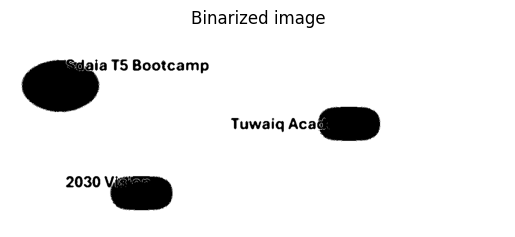

In [6]:
image_path = '/content/Basic_OCR_exrecise.png'
image = cv2.imread(image_path)

display_image(image, 'Original image', is_rgb=True)

gray_image = to_gray(image)
display_image(gray_image, 'gray image')

denoised_image = remove_Noise(gray_image)
display_image(denoised_image, 'Denoised image')

sharpened_image = sharpen_image(denoised_image)
display_image(sharpened_image, 'Sharpened image')

binarized_image = Binarization(sharpened_image)
display_image(binarized_image, 'Binarized image')


# Text Detection using Tesseract

Draw Bounding Boxes

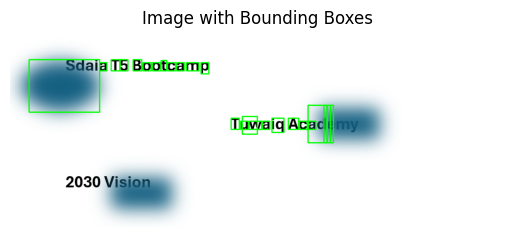

In [7]:
image_path = '/content/Basic_OCR_exrecise.png'
image = cv2.imread(image_path)

boxes = pytesseract.image_to_boxes(gray_image)
boxes_image = image.copy()

for box in boxes.splitlines():
  box = box.split(' ')
  x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])

  cv2.rectangle(boxes_image, (x, boxes_image.shape[0] - y), (w, boxes_image.shape[0] - h), (0, 255, 0), 2)


display_image(boxes_image, "Image with Bounding Boxes", is_rgb=True)

Extract text

In [8]:
gray_image = to_gray(image)

extract_txt = pytesseract.image_to_string(gray_image)
print(extract_txt)

=" T5 Bootcamp

Tuwaiq Acadia



# Text Detection using EasyOCR

In [9]:
reader = easyocr.Reader(['en'])

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [10]:
result = reader.readtext(image)

print(result)

[([[124, 55], [471, 55], [471, 106], [124, 106]], 'Sdaia T5 Bootcamp', 0.7350188397642917), ([[507, 190], [819, 190], [819, 242], [507, 242]], 'Tuwaiq Academy', 0.999023855140278), ([[125, 329], [335, 329], [335, 371], [125, 371]], '2030 Vision', 0.8906961194426193)]


Print the detected words

In [11]:
for detection in result:
  print(detection[1])

Sdaia T5 Bootcamp
Tuwaiq Academy
2030 Vision


Draw bounding box

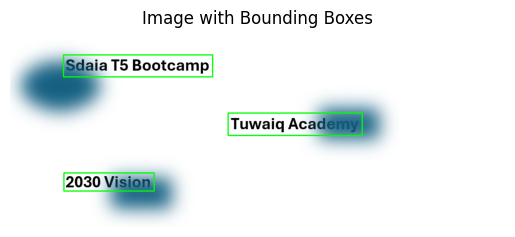

In [12]:
for detection in result:
    bunding_box = detection[0]

    top_left = tuple([int(coord) for coord in bunding_box[0]])
    bottom_right = tuple([int(coord) for coord in bunding_box[2]])


    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

display_image(image, "Image with Bounding Boxes", is_rgb=True)


# Text Detection using KerasOCR

Print the detected words

In [13]:
pipe_line = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


Draw bounding box

In [15]:
image_path = '/content/Basic_OCR_exrecise.png'

image = keras_ocr.tools.read(image_path)

images = [image]

predction_groups = pipe_line.recognize(images)

for predctions in predction_groups:
  for predction in predctions:
      print(predction[0])

1/1 [==============================] - 5s 5s/step
sdaia
t5
bootcamp
academy
tuwaiq
2030
vision


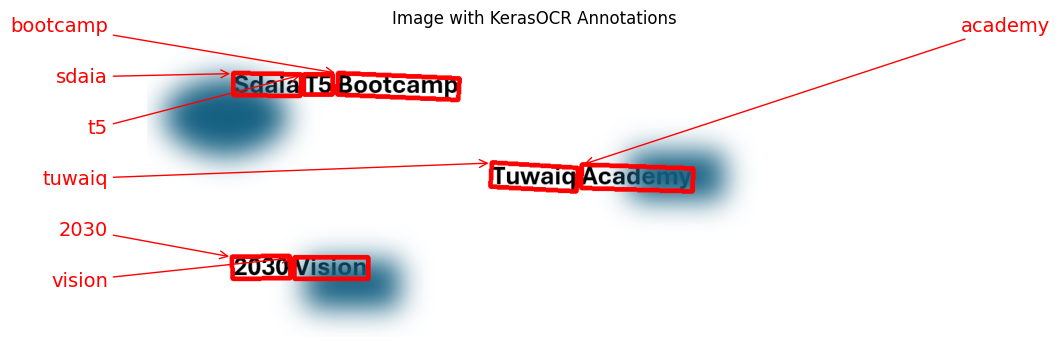

In [17]:
fig, ax = plt.subplots(figsize = (10, 10))
keras_ocr.tools.drawAnnotations(image=images[0], predictions=predction_groups[0], ax=ax)

plt.title("Image with KerasOCR Annotations")
plt.axis('off')
plt.show()